Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Load the IMDb Movies India dataset

In [3]:
file_path = 'IMDb Movies India.csv'
movies_data = pd.read_csv(file_path, encoding='latin1')
movies_data = movies_data.sample(1500, random_state=42)

Select relevant features and target

In [4]:
selected_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

Preprocess the data and selecting unique categories

In [5]:
def limit_categories(df, column, top_n=10):
    top_categories = df[column].value_counts().index[:top_n]
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    return df
for feature in selected_features:
    movies_data = limit_categories(movies_data, feature)
movies_data = pd.get_dummies(movies_data[selected_features + [target]], columns=selected_features)

Define X for features and y for target

In [6]:
X = movies_data.drop(target, axis=1)
y = movies_data[target]

Split data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1)).flatten()

Initialize Ridge Regression model

In [15]:
ridge_model = Ridge(alpha=1.0)

Train the model using X_train and y_train

In [16]:
ridge_model.fit(X_train_imputed, y_train_imputed)

Ridge()

Make predictions using predict()

In [17]:
y_pred = ridge_model.predict(X_test_imputed)

Evaluate model performance (R-squared)

In [18]:
mse = mean_squared_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.0190693623208602
R^2 Score: -0.08113567993957815


 Visualize actual vs predicted ratings

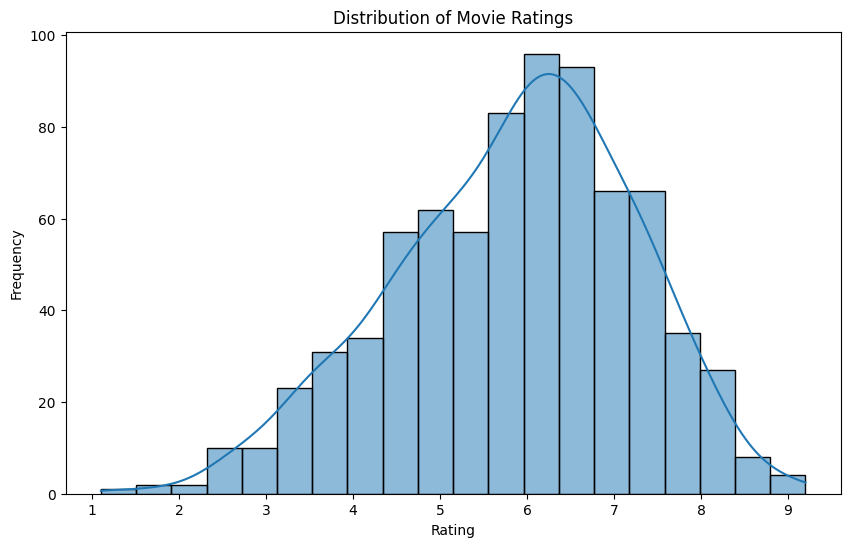

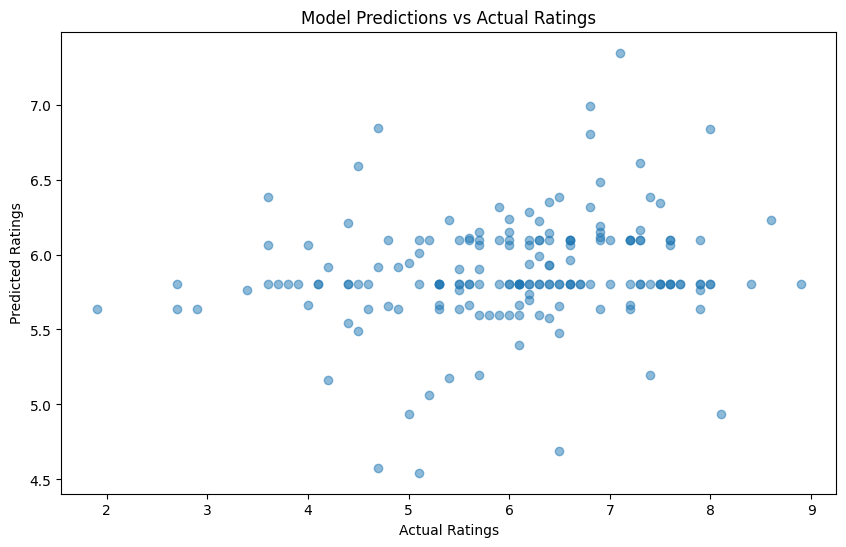

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Model Predictions vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


Feature importance of Ridge model

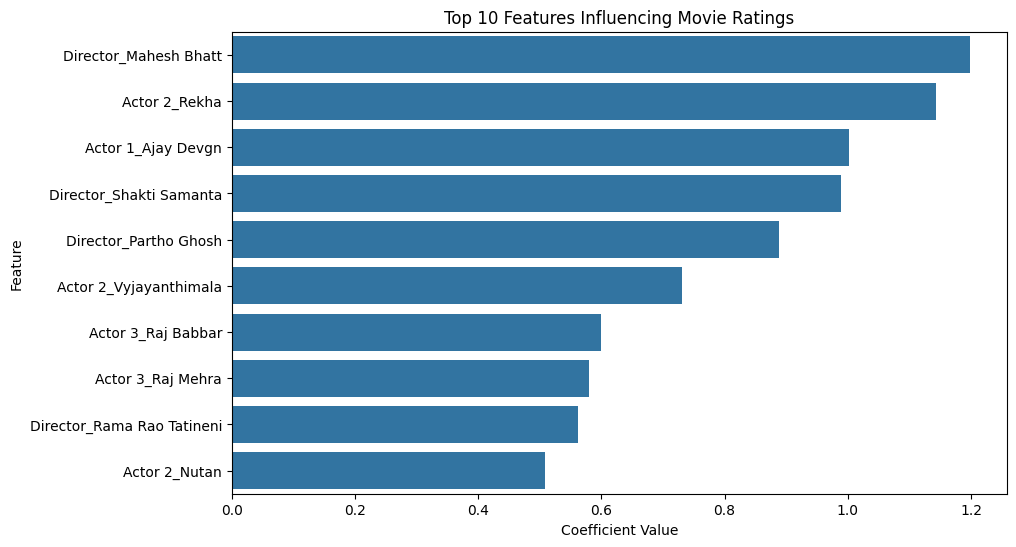

In [20]:
coefficients = pd.Series(ridge_model.coef_, index=X.columns)
top_features = coefficients.abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Features Influencing Movie Ratings')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()